In [1]:
import os
os.chdir("..")

In [2]:
from utils import *
from keras.models import load_model

In [69]:
folder = "A-Moller sim"
n_Moller = 1 # 42

for n_file in range(1, n_Moller + 1):
    Ia_phot_anais = f"{folder}/Ia/DES_Ia-{n_file:04d}_PHOT.FITS"
    Ia_head_anais = f"{folder}/Ia/DES_Ia-{n_file:04d}_HEAD.FITS"

    nonIa_phot_anais = f"{folder}/nonIa/DES_NONIa-{n_file:04d}_PHOT.FITS"
    nonIa_head_anais = f"{folder}/nonIa/DES_NONIa-{n_file:04d}_HEAD.FITS"

    Ia_Moller_preprocess = preprocess(Ia_phot_anais, head_file=Ia_head_anais,
                                      band='FLT', normalize=True)

    nonIa_Moller_preprocess = preprocess(nonIa_phot_anais,
                                         head_file=nonIa_head_anais,
                                         band='FLT', normalize=True)

    if n_file == 1:
        Ia_curves_Moller = Ia_Moller_preprocess
        nonIa_curves_Moller = nonIa_Moller_preprocess
        continue
    
    Ia_curves_Moller = pd.concat((Ia_curves_Moller, Ia_Moller_preprocess),
                                 ignore_index=True)
    nonIa_curves_Moller = pd.concat((nonIa_curves_Moller, nonIa_Moller_preprocess),
                                    ignore_index=True)

curves_Moller = pd.concat((Ia_curves_Moller, nonIa_curves_Moller),
                          ignore_index=True)

curves_Moller['Type'] = [1 if j < len(Ia_curves_Moller) else 0
                         for j in range(len(curves_Moller))]


c:\Users\aleja\anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:509: RuntimeWarning: The maximal number of iterations (20) allowed for finding smoothing
spline with fp=s has been reached. Probable cause: s too small.
(abs(fp-s)/s>0.001)
  warnings.warn(RuntimeWarning(_iermess[ier][0]))


In [38]:
curves_RNN_Moller, types_RNN_Moller = RNN_reshape(curves_Moller)

In [61]:
model_file = "data_folder/model_1bl_8LSTM.h5"
best_model = load_model(f"./{model_file}")

In [62]:
model_predict_Moller = best_model.predict(curves_RNN_Moller)

11495/11495 [==============================] - 48s 4ms/step


In [63]:
nan_index_Moller = np.argwhere(np.isnan(model_predict_Moller))
print(f"#NaN values: {nan_index_Moller.size}")
print(f"#lightcurves: {model_predict_Moller.size}")

mask = np.ones(model_predict_Moller.shape, dtype=bool)
mask[nan_index_Moller] = False

#NaN values: 38
#lightcurves: 367834


Normalized confusion matrix


(<Figure size 640x480 with 2 Axes>,
 <AxesSubplot:title={'center':'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>)

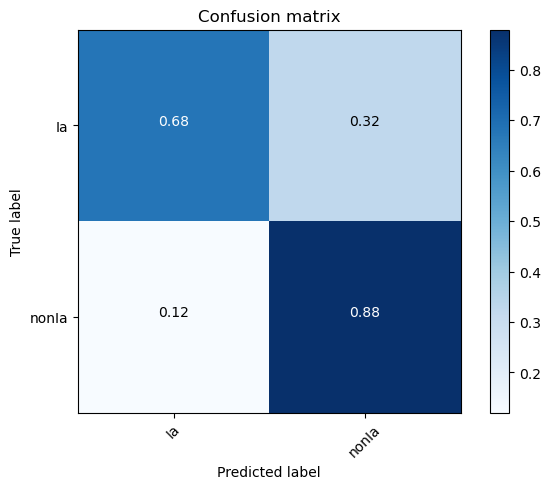

In [64]:
plot_confusion_matrix(types_RNN_Moller[mask],
                      model_predict_Moller[mask].round(),
                      ['Ia', 'nonIa'], normalize=True)

AUC = 0.777318427401961


(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:title={'center':'ROC Curve'}, xlabel='False Positive rate', ylabel='True Positive rate'>)

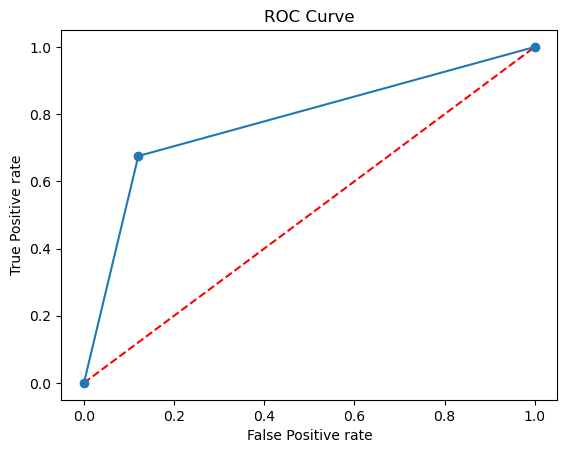

In [65]:
plot_roc_curve(types_RNN_Moller[mask],
               model_predict_Moller[mask].round(),
               auc_print=True)

### model
- 1 bidirectional layer
- 4 LSTM
- no data augmentation

In [4]:
model_file = "data_folder/model_1bl_4LSTM.keras"
best_model = load_model(f"./{model_file}")

In [5]:
model_predict_Moller = best_model.predict(curves_RNN_Moller)  # murió la RAM

NameError: name 'curves_RNN_Moller' is not defined

In [ ]:
plot_confusion_matrix(types_RNN_Moller[mask],
                      model_predict_Moller[mask].round(),
                      ['Ia', 'nonIa'], normalize=True)

In [ ]:
plot_roc_curve(types_RNN_Moller[mask],
               model_predict_Moller[mask].round(),
               auc_print=True)

# My data

In [3]:
Ia_phot = "Lightcurves\curves\Ia\DES\DES_Ia_PHOT.FITS"
Ia_head = "Lightcurves\curves\Ia\DES\DES_Ia_HEAD.FITS"

nonIa_phot = "Lightcurves\curves/nonIa\DES\DES_nonIa_PHOT.FITS"
nonIa_head = "Lightcurves\curves/nonIa\DES\DES_nonIa_HEAD.FITS"

Ia_preprocess = preprocess(Ia_phot, head_file=Ia_head, normalize=True)
nonIa_preprocess = preprocess(nonIa_phot, head_file=nonIa_head, normalize=True)

curves = pd.concat((Ia_preprocess, nonIa_preprocess), ignore_index=True)

In [4]:
types = [1 if j < len(Ia_preprocess) else 0 for j in range(len(curves))]
curves['Type'] = types

In [5]:
curves_RNN, types_RNN = RNN_reshape(curves)

In [6]:
model_file = "data_folder/model_1bl_4LSTM.keras"
best_model = load_model(f"./{model_file}")

In [7]:
model_predict = best_model.predict(curves_RNN)

6198/6198 [==============================] - 22s 3ms/step


In [ ]:
nan_index = np.argwhere(np.isnan(model_predict))
print(f"#NaN values: {nan_index.size}")

mask = np.ones(model_predict.shape, dtype=bool)
mask[nan_index] = False

In [ ]:
plot_confusion_matrix(types_RNN[mask], model_predict[mask].round(),
                      ['Ia', 'nonIa'], normalize=True)

In [10]:
plot_confusion_matrix(types_RNN[mask], model_predict[mask].round(),
                      ['Ia', 'nonIa'], normalize=True)

Normalized confusion matrix


### File: norm

In [66]:
curves_file = pd.read_parquet('data_folder/curves_preprocessed_norm.parquet')

curves_preprocessed, types = RNN_reshape(curves_file)

model_predict_file = best_model.predict(curves_preprocessed)

6198/6198 [==============================] - 35s 6ms/step


In [67]:
nan_index_file = np.argwhere(np.isnan(model_predict_file))
print(f"#NaN values: {nan_index_file.size}")

mask_file = np.ones(model_predict_file.shape, dtype=bool)
mask_file[nan_index_file] = False

#NaN values: 0


Normalized confusion matrix


(<Figure size 640x480 with 2 Axes>,
 <AxesSubplot:title={'center':'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>)

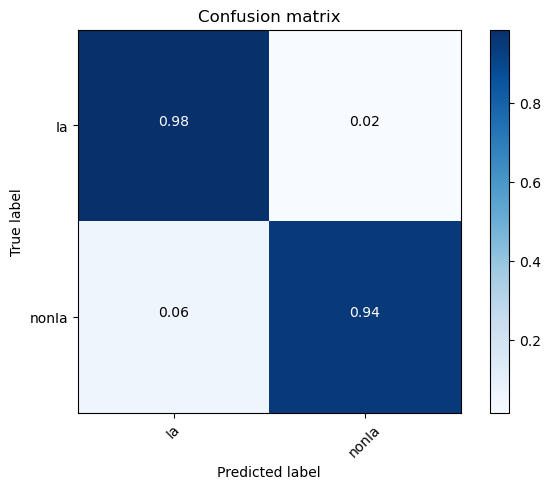

In [68]:
plot_confusion_matrix(types[mask_file], model_predict_file[mask_file].round(),
                      ['Ia', 'nonIa'], normalize=True)


AUC = 0.9590091383451442


(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:title={'center':'ROC Curve'}, xlabel='False Positive rate', ylabel='True Positive rate'>)

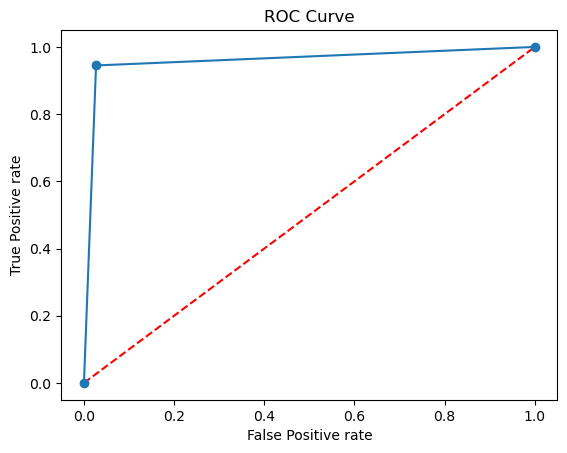

In [60]:
plot_roc_curve(types[mask_file],
               model_predict_file[mask_file].round(),
               auc_print=True)

In [18]:
curves_file = np.load('data_folder/curves_RNN_norm_aug.npy')
types_file = np.load('data_folder/types_RNN_norm_aug.npy')

model_predict_file = best_model.predict(curves_file)

68173/68173 [==============================] - 271s 4ms/step


In [19]:
nan_index_file = np.argwhere(np.isnan(model_predict_file))
print(f"#NaN values: {nan_index_file.size}")

mask_file = np.ones(model_predict_file.shape, dtype=bool)
mask_file[nan_index_file] = False

#NaN values: 0


Normalized confusion matrix


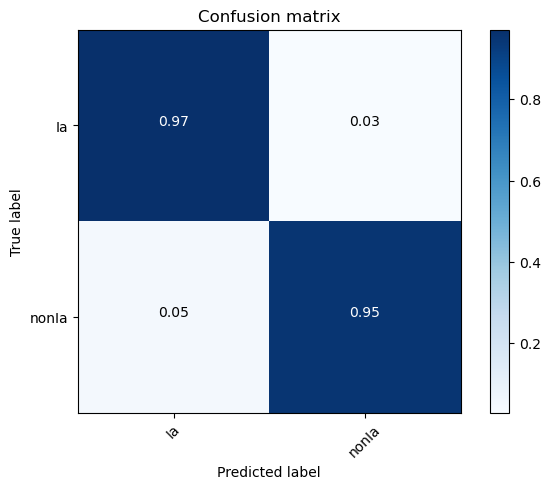

In [20]:
plot_confusion_matrix(types_file[mask_file], model_predict_file[mask_file].round(),
                      ['Ia', 'nonIa'], normalize=True)

AUC = 0.9601986304786663


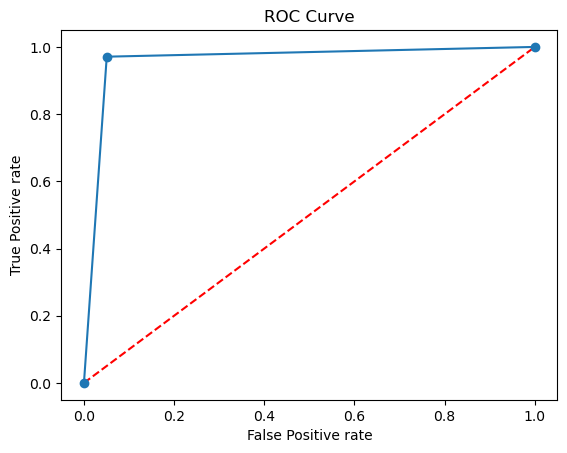

In [21]:
plot_roc_curve(types_file[mask_file],
               model_predict_file[mask_file].round(),
               auc_print=True)

### discarding data augmentation by hand

In [13]:
Ia_phot = "Lightcurves\curves\Ia\DES\DES_Ia_PHOT.FITS"
Ia_head = "Lightcurves\curves\Ia\DES\DES_Ia_HEAD.FITS"

nonIa_phot = "Lightcurves\curves/nonIa\DES\DES_nonIa_PHOT.FITS"
nonIa_head = "Lightcurves\curves/nonIa\DES\DES_nonIa_HEAD.FITS"

Ia_preprocess = curves_augmentation(preprocess(Ia_phot, head_file=Ia_head, normalize=True))
nonIa_preprocess = curves_augmentation(preprocess(nonIa_phot, head_file=nonIa_head, normalize=True))

curves = pd.concat((Ia_preprocess, nonIa_preprocess), ignore_index=True)

c:\Users\aleja\anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:509: RuntimeWarning: The maximal number of iterations (20) allowed for finding smoothing
spline with fp=s has been reached. Probable cause: s too small.
(abs(fp-s)/s>0.001)
  warnings.warn(RuntimeWarning(_iermess[ier][0]))


In [14]:
types = [1 if j < len(Ia_preprocess) else 0 for j in range(len(curves))]
curves['Type'] = types

In [16]:
curves.dropna(inplace=True)

In [17]:
curves

,Days,g,r,i,z,Type
992550,"[-29.03887499999837, -27.7869861111095, -26.53...","[0.06082346711012897, -0.04251820756086606, -0...","[-0.019031264826644044, -0.016165141484735683,...","[-0.052619317342463244, -0.04552225137402912, ...","[0.011768400124013218, 0.012133886464097136, 0...",1
992551,"[-15.502062500003376, -14.161436237377098, -12...","[0.10828902198115203, 0.17452622375971938, 0.2...","[0.06651521635415102, 0.09976788987902842, 0.1...","[0.10251712081648759, 0.11926247402786444, 0.1...","[0.07811595903572532, 0.09827872591129798, 0.1...",1
992552,"[-20.9312812499993, -19.731725694443732, -18.5...","[-0.007065555254710862, 0.022379991731781828, ...","[0.0129165428312607, 0.014698430305207824, 0.0...","[0.02244132345291727, 0.025125826868852893, 0....","[-0.004828757804337942, 0.018807528011998143, ...",1
992553,"[-28.227312499999243, -26.785595328282113, -25...","[0.038775455704807164, 0.040228310495487175, 0...","[-0.00027269873010380064, -0.00507862372512060...","[0.010069477228476384, -0.00579031718224541, -...","[0.008066905934654263, 0.0007812698233508031, ...",1
992554,"[-27.305437499999243, -26.022488005049723, -24...","[-0.003787219013035653, -0.025251122214627435,...","[0.007710352131221429, 0.007578281461601633, 0...","[0.009350060190610653, 0.014285623331175147, 0...","[0.05106390239481494, 0.04368202269394999, 0.0...",1
...,...,...,...,...,...,...
2181515,"[-3.4763125000026776, -2.427464015154163, -1.3...","[0.08533443569063356, 0.10024037798867753, 0.1...","[0.022224778394982256, 0.020521372813541057, 0...","[0.004696822372863185, 0.00962850799130517, 0....","[0.022353605356277152, 0.015167048580898611, 0...",0
2181516,"[-20.81837500000256, -20.192041666669176, -19....","[0.003907519259869636, 0.025789574173754853, 0...","[0.01637828858412245, 0.02368285073359723, 0.0...","[-0.02433800643774081, -0.024885625826730134, ...","[0.02307079034910227, 0.009305047447172013, -0...",0
2181517,"[-28.601031250000233, -27.56113226010127, -26....","[-0.004375961776927578, 0.020232869444355282, ...","[-0.03013591117360386, -0.016400151958351313, ...","[0.0018300734366611655, 0.002595472650152967, ...","[0.005671448911758145, 0.009769489811989872, 0...",0
2181518,"[-32.90640624999651, -31.82913352272384, -30.7...","[0.0415861482054548, 0.0683898714841792, 0.092...","[0.012012746194899707, 0.030537016950116545, 0...","[0.01628874308861311, 0.029066891135594655, 0....","[0.03418934417863105, 0.03753725791827613, 0.0...",0


In [18]:
curves_RNN, types_RNN = RNN_reshape(curves)

In [19]:
model_file = "data_folder/model_1bl_4LSTM.keras"
best_model = load_model(f"./{model_file}")

In [20]:
model_predict = best_model.predict(curves_RNN)

6198/6198 [==============================] - 23s 4ms/step


Normalized confusion matrix


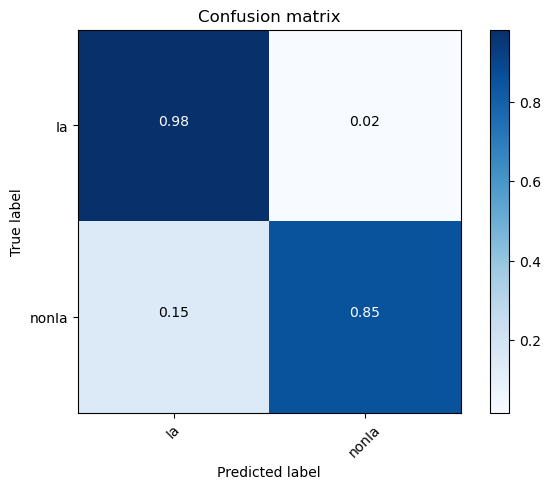

In [21]:
plot_confusion_matrix(types_RNN, model_predict.round(),
                      ['Ia', 'nonIa'], normalize=True)